Camilo Angarita 201111642\
Julian Velasquez 201014210\
Oscar Mauricio Cepeda 201123181\
Juan Camilo Marín 201412568

# Exercise 14

## Predict rating using LSTM


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [5]:
dataTraining = pd.read_csv('https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [6]:
plots = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [7]:
plots

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [8]:
y

3107    1
900     0
6724    1
4704    1
2582    1
       ..
8417    0
1592    0
1723    0
7605    1
215     1
Name: rating, Length: 7895, dtype: int64

# Exercise 14.1

- Remove stopwords 
- Lowercase
- split the text in words 
- pad_sequences

In [11]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Flatten
import tensorflow as tf

In [12]:
vect = CountVectorizer(   ngram_range=(1,4) , stop_words= "english"   , max_features = 1000)
X_dtm = vect.fit_transform(plots)
X_dtm.shape

(7895, 1000)

In [13]:
plot_split  =  plots.str.split(" ")

words = list(vect.vocabulary_.keys())
words
vocabulary = {x: idx + 1 for idx, x in enumerate(set(words))}
vocabulary

#aplicarle el codigo a lo que yo quiero codificar 
max_len = 400
plot_split = [x[:max_len] for x in plot_split]
#Convert characters to int and pad
plot_split = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in plot_split]
plot_pad = sequence.pad_sequences(plot_split, maxlen=max_len)

# Exercise 14.2

Create a LSTM neural network to predict the rating of a movie

Calculate the testing set accuracy

In [14]:
from livelossplot import PlotLossesKeras
%matplotlib inline
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(plot_pad, y, test_size=0.33, random_state=42)

In [16]:
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()   

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 128)          128128    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 177,601
Trainable params: 177,601
Non-trainable params: 0
_________________________________________________________________


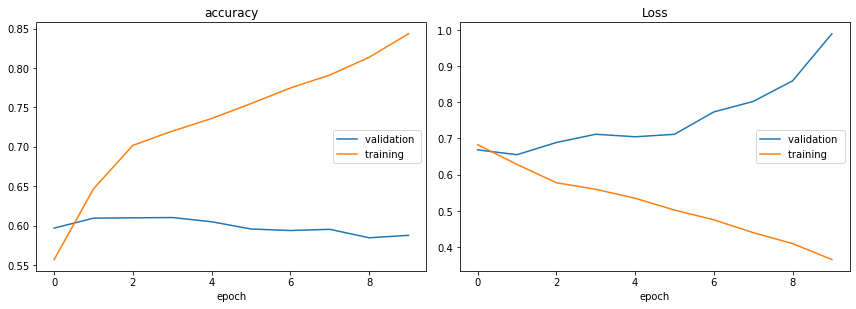

accuracy
	validation       	 (min:    0.584, max:    0.610, cur:    0.587)
	training         	 (min:    0.557, max:    0.843, cur:    0.843)
Loss
	validation       	 (min:    0.655, max:    0.989, cur:    0.989)
	training         	 (min:    0.366, max:    0.683, cur:    0.366)


In [17]:
model.fit(X_train, y_train, validation_data=[X_test, y_test], 
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

In [18]:
y_pred = model.predict_classes(X_test)[:,0]

print((y_pred == y_test).mean())

0.5874904067536454


Mediante el uso de pad sequences se logro codificar cada una de las las palabras clave de las sinopsis para lograr asi un modelo numerico que puediera ser ingresado en una red neuronal. 

La primera aproximación al modelo brinda un nivel de accuracy del 0.58, sin embargo logra integrar ya el texto de las peliculas para hacer un pronostico,con mayor calibración y procesamiento computacional se lograria obtener un desempeño mucho mas alto. 
